In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Check available devices
print("Available devices:")
for device in tf.config.list_physical_devices():
    print(f"  - {device.device_type}: {device.name}")

# Optional: force GPU usage (will error if GPU is not available)
# with tf.device("/GPU:0"):

# 1. Load the dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target



Available devices:
  - CPU: /physical_device:CPU:0


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [11]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# load the data
housing = fetch_california_housing()
X, y = housing.data, housing.target

# build a DataFrame
df = pd.DataFrame(X, columns=housing.feature_names)
df['MedHouseVal'] = y

# save to CSV (in your current working directory)
df.to_csv('california_housing.csv', index=False)

print("Saved  california_housing.csv")


Saved  california_housing.csv


In [3]:
import pandas as pd
from tabulate import tabulate
from sklearn.datasets import fetch_california_housing

# Load dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=housing.feature_names)
df['MedHouseVal'] = y

# Display as a beautiful table (first 10 rows)
print("\n📋 California Housing Data (Sample):")
print(tabulate(df.head(10), headers='keys', tablefmt='fancy_grid', showindex=False))



📋 California Housing Data (Sample):
╒══════════╤════════════╤════════════╤═════════════╤══════════════╤════════════╤════════════╤═════════════╤═══════════════╕
│   MedInc │   HouseAge │   AveRooms │   AveBedrms │   Population │   AveOccup │   Latitude │   Longitude │   MedHouseVal │
╞══════════╪════════════╪════════════╪═════════════╪══════════════╪════════════╪════════════╪═════════════╪═══════════════╡
│   8.3252 │         41 │    6.98413 │    1.02381  │          322 │    2.55556 │      37.88 │     -122.23 │         4.526 │
├──────────┼────────────┼────────────┼─────────────┼──────────────┼────────────┼────────────┼─────────────┼───────────────┤
│   8.3014 │         21 │    6.23814 │    0.97188  │         2401 │    2.10984 │      37.86 │     -122.22 │         3.585 │
├──────────┼────────────┼────────────┼─────────────┼──────────────┼────────────┼────────────┼─────────────┼───────────────┤
│   7.2574 │         52 │    8.28814 │    1.07345  │          496 │    2.80226 │      37.85 │  

In [ ]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:

# 3. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-1.15508475, -0.28632369, -0.52068576, ...,  0.06740798,
         0.1951    ,  0.28534728],
       [-0.70865905,  0.11043502, -0.16581537, ..., -0.03602975,
        -0.23549054,  0.06097472],
       [-0.21040155,  1.85617335, -0.61076476, ..., -0.14998876,
         1.00947776, -1.42487026],
       ...,
       [ 2.80902421, -0.28632369,  0.75501156, ..., -0.02646898,
         0.78014149, -1.23041404],
       [-0.57542978,  0.58654547, -0.06124296, ..., -0.04390537,
         0.52740357, -0.08860699],
       [-0.17259111, -0.92113763, -0.6058703 , ...,  0.05466644,
        -0.66608108,  0.60445493]])

In [6]:

# 4. Build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.005,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mse')


In [7]:
# 5. Train the model
print("\n🧠 Training the model...")
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)



🧠 Training the model (CUDA if available)...
Epoch 1/100
465/465 [==============================] - 3s 3ms/step - loss: 0.5502 - val_loss: 0.4051
Epoch 2/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3645 - val_loss: 0.3929
Epoch 3/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3655 - val_loss: 0.3771
Epoch 4/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3199 - val_loss: 0.3472
Epoch 5/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3101 - val_loss: 0.3677
Epoch 6/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3036 - val_loss: 0.3333
Epoch 7/100
465/465 [==============================] - 1s 2ms/step - loss: 0.3199 - val_loss: 0.3157
Epoch 8/100
465/465 [==============================] - 2s 3ms/step - loss: 0.2863 - val_loss: 0.3048
Epoch 9/100
465/465 [==============================] - 1s 2ms/step - loss: 0.2870 - val_loss: 0.3171
Epoch 10/100
465/465 [========================

In [8]:
# 6. Predict and evaluate
print("\n📊 Evaluating the model...")
y_pred = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n🔍 Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")



📊 Evaluating the model...
129/129 [==============================] - 0s 2ms/step

🔍 Evaluation Results:
Mean Squared Error (MSE): 0.2730
R² Score: 0.7917


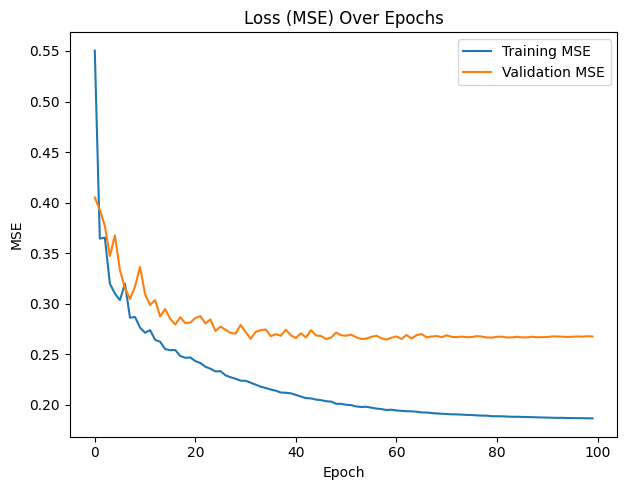

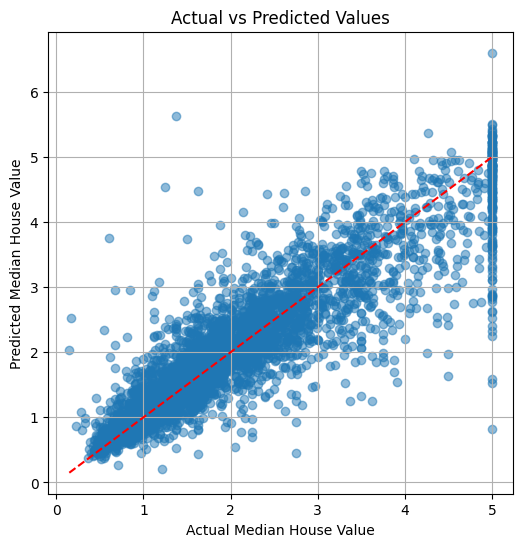

In [9]:
# 7. Plot training metrics
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('Loss (MSE) Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()


plt.tight_layout()
plt.show()

# 8. Actual vs Predicted Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()